In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
def image_read(image1, title1 = ""):
    fig = plt.figure(figsize = (15, 15))
    ax = fig.add_subplot(121)
    ax.imshow(image1, cmap = "gray")
    ax.set(xticks = [], yticks = [], title = title1)
    

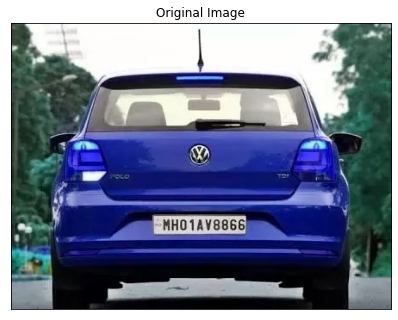

In [2]:
image = cv2.imread("Cars198.png")
plot_image = image_read(image,  title1 = "Original Image")

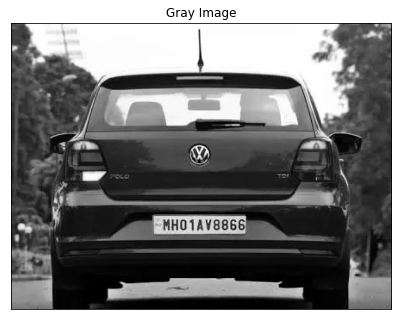

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_read( gray, title1 = "Gray Image")

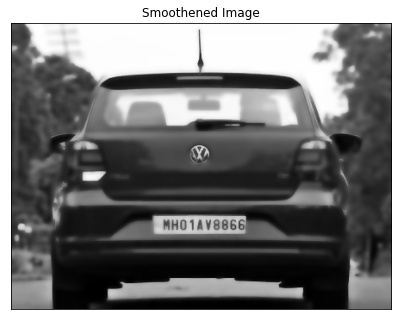

In [4]:
smooth = cv2.bilateralFilter(gray, 8, 75, 75)
image_read( smooth, title1 ="Smoothened Image")

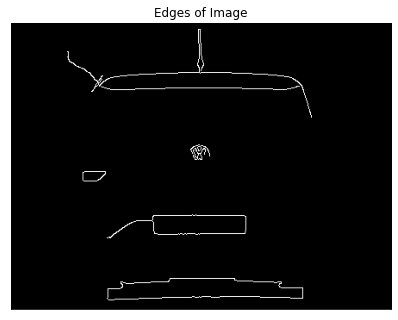

In [5]:
edge = cv2.Canny(smooth, 100, 900)
image_read( edge, title1  = "Edges of Image")

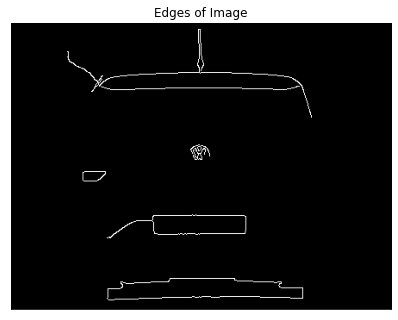

In [6]:
edge = cv2.Canny(smooth, 100, 900)
image_read( edge, title1  = "Edges of Image")

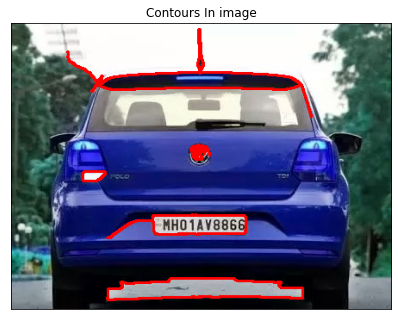

In [7]:
contours, new = cv2.findContours(edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image_duplicate = image.copy()
s = cv2.drawContours(image_duplicate, contours, -1, (255, 0, 0), 2)
image_read(image_duplicate, title1 = "Contours In image")

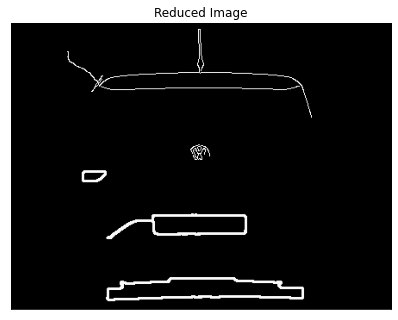

In [8]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
image_r = edge.copy()
_ = cv2.drawContours(image_r, contours, -1, (250, 50, 70), 2)
image_read( image_r, title1 = "Reduced Image")

In [9]:
num_plate = None
for c in contours:
    arc = cv2.arcLength(c, True)
    count = cv2.approxPolyDP(c, 0.02 * arc, True)
    if len(count) == 5:
        x, y, w, h = cv2.boundingRect(c)
        num_plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", num_plate)

True

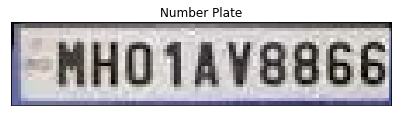

In [11]:
image_read(num_plate,title1 = "Number Plate")